In [1]:
import pandas as pd
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal as random_gauss
from scipy.stats import multivariate_normal
from scipy import random, linalg

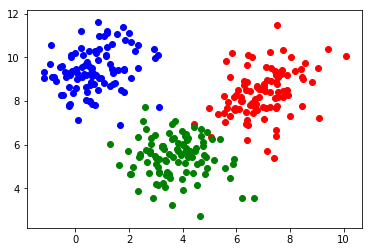

[[ 9.57281982  3.80261606]
 [ 6.50848689  0.83234925]
 [ 3.82488034  7.88424242]]
singular matrix


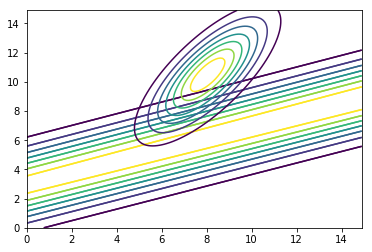

singular matrix


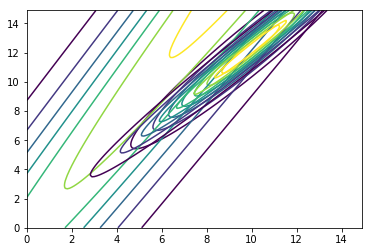

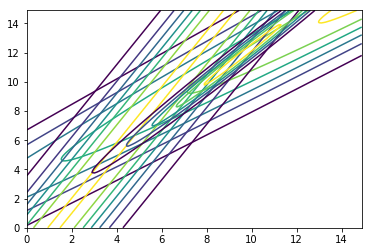

singular matrix


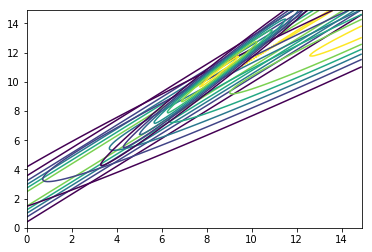

singular matrix


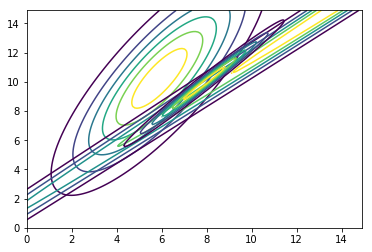

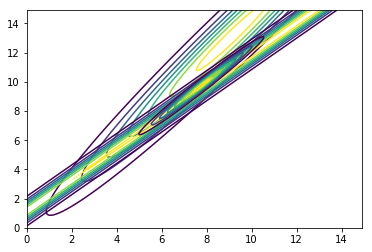

singular matrix


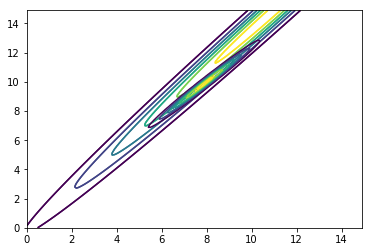

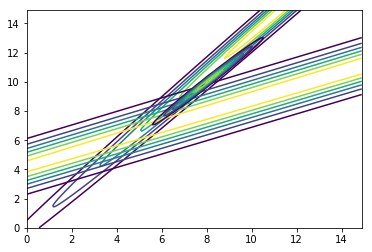

singular matrix


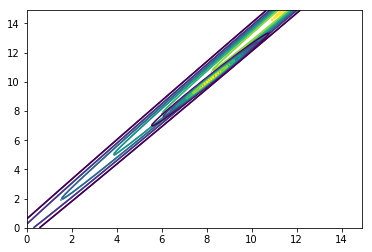

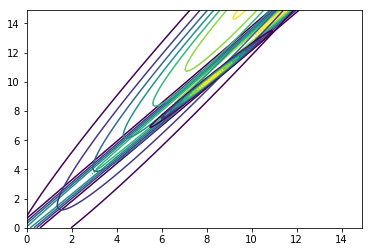

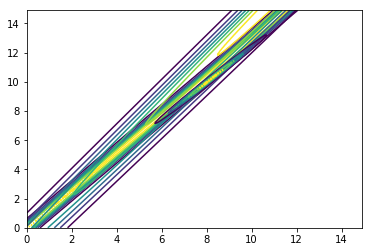

singular matrix


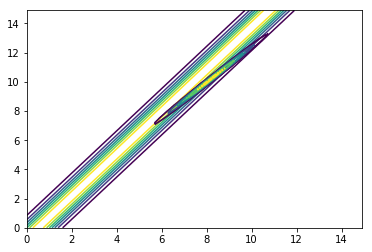

singular matrix


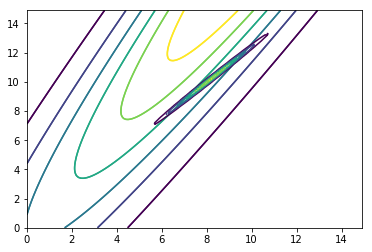

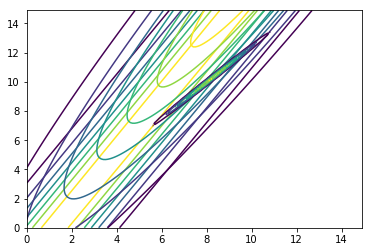

singular matrix


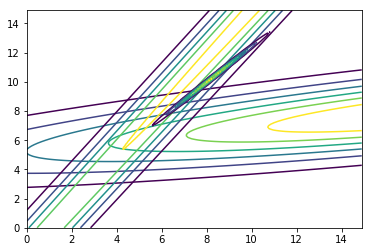

singular matrix


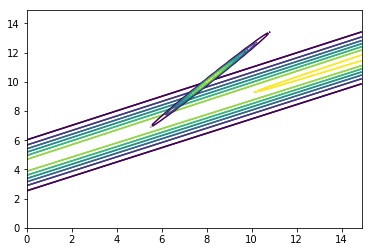

singular matrix


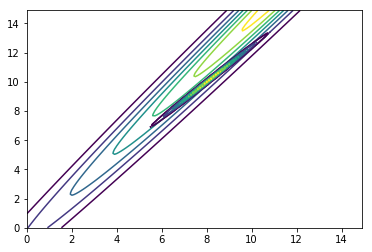

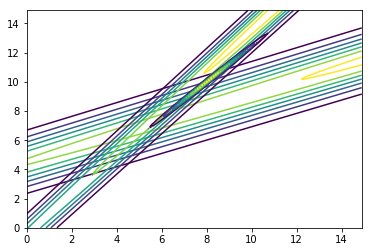

singular matrix


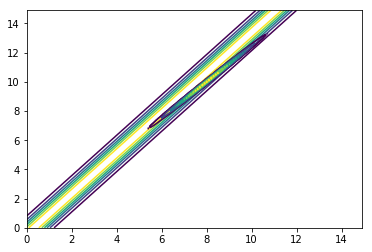

singular matrix


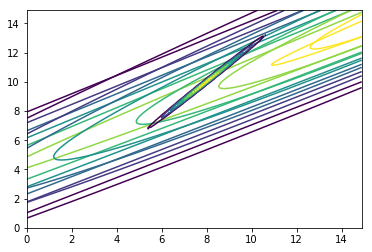

singular matrix


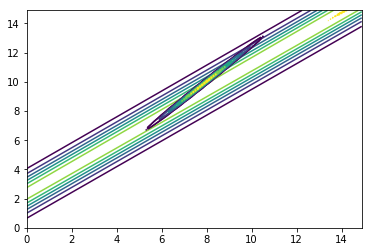

singular matrix


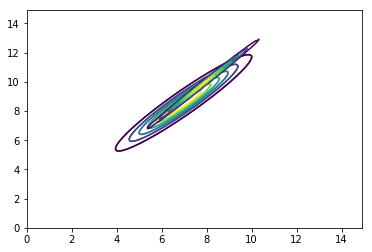

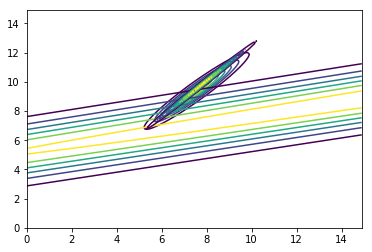

singular matrix


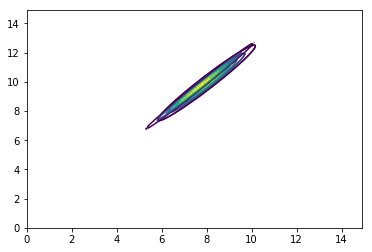

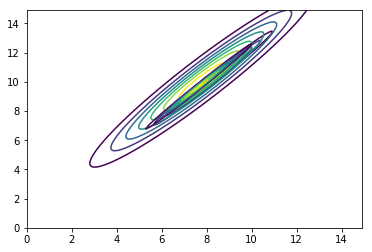

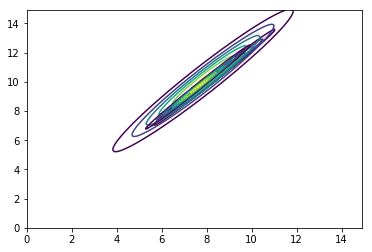

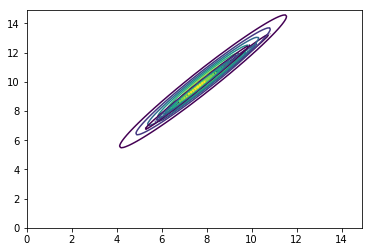

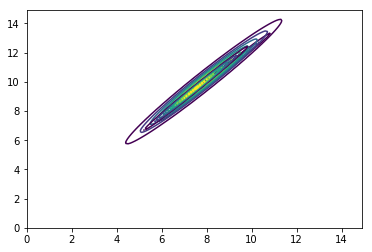

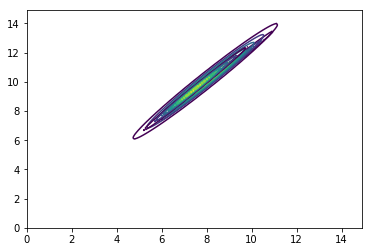

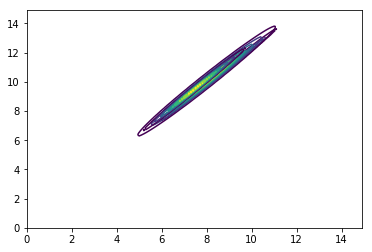

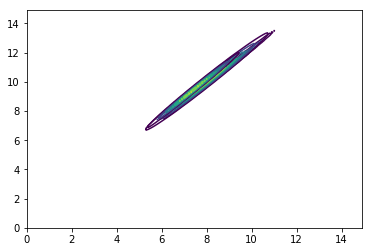

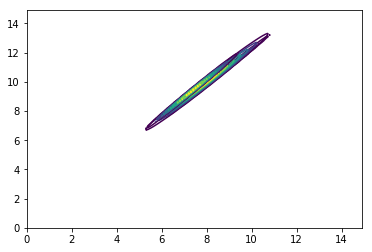

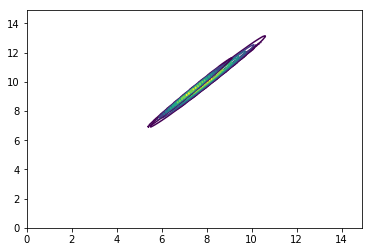

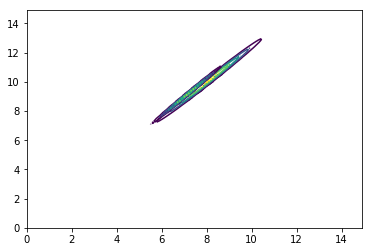

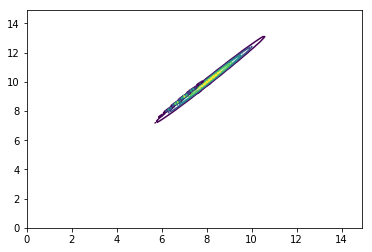

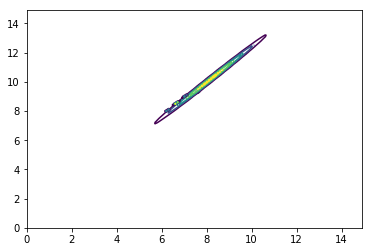

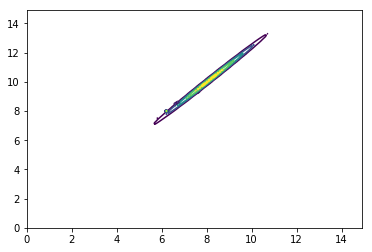

singular matrix


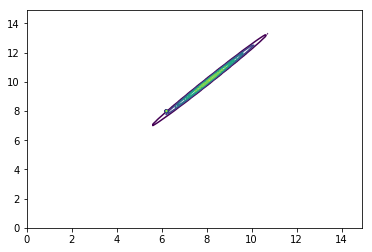

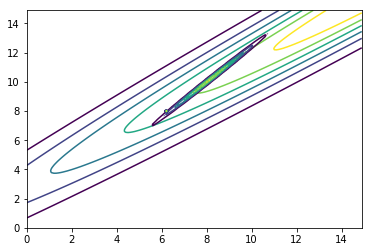

ValueError: zero-size array to reduction operation minimum which has no identity

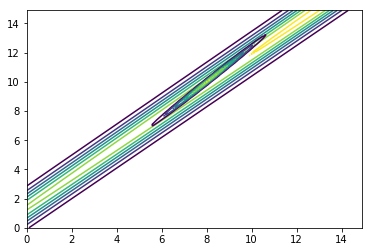

In [5]:
def generate_mean():
    return random.rand(2,) * 10

def generate_covariance():
    random_matrix = random.rand(2, 2) * 10
    return np.dot(random_matrix, random_matrix.transpose())

x = []
y = []
distributions = []
colors = ["red", "blue", "green"]
covs = [generate_covariance() for _ in range(3)]
for (x, y), cov in zip([random.rand(2,) * 10 for _ in range(3)], covs):
    distributions.append(random_gauss((x, y), cov, 100))

samples = np.concatenate(distributions)

# plot samples
for d, c in zip(distributions, colors):
    plt.scatter(d[:,0], d[:,1], color=c)
plt.show()
    
phi = [1/3] * 3
mu = [generate_mean() for _ in range(3)]

sigma = []
for _ in range(len(phi)):
    sigma.append(generate_covariance())


weights = np.zeros((len(phi), len(samples)))
for iteration in range(100):
    # e-step
    for j in range(len(phi)):
        rv = multivariate_normal(mu[j], sigma[j])
        for i in range(len(samples)):
            weights[j][i] = rv.pdf(samples[i])
    # m-step
    for j in range(len(phi)):
        phi[j] = np.average(weights[j])
        for w, sample in zip(weights[j], samples):
            mu[j] += w * sample
        mu[j] = mu[j]/sum(weights[j])
        s = np.zeros((2, 2))
        for i in range(len(samples)):
            x = samples[i]
            s += weights[j][i] * (np.mat(x - mu[j]).T * np.mat(x - mu[j]))
        s = s / sum(weights[j])
        sigma[j] = s

    for j in range(len(phi)):
        x, y = np.mgrid[0:15:0.1, 0:15:0.1]
        pos = np.dstack((x, y))
        try:
            rv = multivariate_normal(mu[j], sigma[j])
        except np.linalg.LinAlgError as e:
            print(e)
            mu[j] = generate_mean()
            sigma[j] = generate_covariance()
            
            
        if iteration % 2 == 0: plt.contour(x, y, rv.pdf(pos))
    plt.show()
    